In [1]:
import numpy as np
import keras
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10 as dataset
#from keras.datasets import mnist as dataset

(X_train, y_train), (X_test, y_test) = dataset.load_data()
X_train = X_train.reshape( X_train.shape + (1,) if len(X_train.shape)==3 else X_train.shape )
X_test = X_test.reshape( X_test.shape + (1,) if len(X_test.shape)==3 else X_test.shape )
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
nb_classes = max(y_train) + 1
Y_train = keras.utils.np_utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.np_utils.to_categorical(y_test, nb_classes)

('X_train shape:', (50000, 32, 32, 3))
(50000, 'train samples')
(10000, 'test samples')


('category:', array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.]))


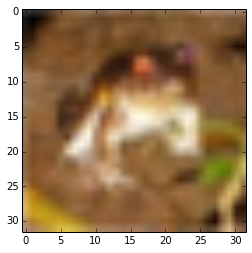

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

print('category:', Y_train[0])
plt.imshow(X_train[0].reshape(X_train.shape[1:-1] if X_train.shape[-1] == 1 else X_train.shape[1:] ))

In [4]:
model = keras.models.Sequential()
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu', input_shape=X_train.shape[1:]))
model.add(Convolution2D(32, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(Convolution2D(64, 3, 3, border_mode='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,       activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

#optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=1e-6)
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=1e-6, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution2d_1 (Convolution2D)  (None, 32, 32, 32)    896         convolution2d_input_1[0][0]      
____________________________________________________________________________________________________
convolution2d_2 (Convolution2D)  (None, 32, 32, 32)    9248        convolution2d_1[0][0]            
____________________________________________________________________________________________________
maxpooling2d_1 (MaxPooling2D)    (None, 16, 16, 32)    0           convolution2d_2[0][0]            
____________________________________________________________________________________________________
dropout_1 (Dropout)              (None, 16, 16, 32)    0           maxpooling2d_1[0][0]             
___________________________________________________________________________________________

In [5]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(X_train)

In [6]:
history = keras.callbacks.History()
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=64),
                    samples_per_epoch=X_train.shape[0],
                    nb_epoch=30,
                    validation_data=(X_test, Y_test),
                    verbose=1,
                    callbacks=[history])

Epoch 1/30
50000/50000 [==============================] - 394s - loss: 1.8562 - acc: 0.3137 - val_loss: 1.5307 - val_acc: 0.4331

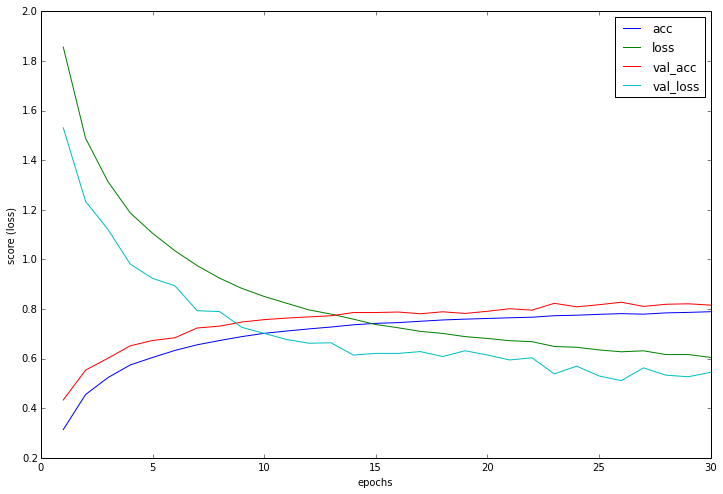

In [16]:
fig = plt.figure(figsize=(12, 8))
axis = fig.add_subplot(111)
axis.set_xlabel('epochs')
axis.set_ylabel('score (loss)')
for key in history.history.keys():
    values = history.history[key]
    axis.plot( range(1, len(values)+1), values, label=key )
axis.legend()